In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
import numpy as np
import os

In [2]:
plt.rc('font', family='Malgun Gothic')

In [3]:
plt.style.use(['ggplot'])

In [4]:
def read_csv_ym(station_name, year, month):
    if year != '2020':
        df1 = pd.read_csv(f'station_name_no_nan/{station_name}/{year}/{station_name}_{year}_{month}.csv')
    else:
        df1 = pd.read_csv(f'station_name_no_nan/{station_name}/{year}/{station_name}_2020_1.csv')
    return df1, month

In [5]:
def make_list(df, pm, date):
    resultArr = np.zeros((25,date))
    if pm == 10:
        # DataFrame.'특성명'.'데이터'.'행렬'.'transpose'
        pm10_Arr = df.pm10.values.reshape(date,24).T
        # 행렬 연산을 통해 위의 24x31행렬을 25x32행렬로 확장해줌
        resultArr[1:,:] = resultArr[1:,:] + pm10_Arr
        return resultArr.tolist()
    elif pm == 2.5:
        pm25_Arr = df.pm25.values.reshape(date,24).T
        resultArr[1:,:] = resultArr[1:,:] + pm25_Arr
        return resultArr.tolist()
    else:
        print('check your pm!!!')

In [6]:
def make_si_list_rev2(df, month, pm):
    month31 = ['1','3','5','7','8','10','12']
    month30 = ['4','6','9','11']
    month28 = ['2'] # 2016년 2월은 그냥 빼자...
    # 31일까지 있는 달
    if month in month31:
        return make_list(df, pm, 31)
    # 30일까지 있는 달
    elif month in month30:
        return make_list(df, pm, 30)
    # 28일까지 있는 달
    elif month in month28:
        return make_list(df, pm, 28)
    else:
        print("isn't your year 2016 ???")

In [7]:
# 결측치 0 을 지우는 함수
def del_nan(si_list1, si_list2):
    new_si_list1=[]
    new_si_list2=[]
    for i in range(len(si_list1)):
        if (si_list1[i] * si_list2[i]) != 0:
            new_si_list1.append(si_list1[i])
            new_si_list2.append(si_list2[i])
    return new_si_list1, new_si_list2

In [8]:
# 변수의 이름을 가져와서 label을 만들기 쉽게 한다.
def namestr(obj):
    return [name for name in globals() if globals()[name] is obj][0]

In [9]:
def plot_compare(station1, station2, time):
    st1, st2 = del_nan(station1[time], station2[time])
    plt.plot(st1, label=f'{namestr(station1)} : {time}시')
    plt.plot(st2, label=f'{namestr(station2)} : {time}시')

In [20]:
def plot_compare_rev1(station1, station2, time):
    plt.plot(station1, label=f'{namestr(station1)} : {time}시')
    plt.plot(station2, label=f'{namestr(station2)} : {time}시')

In [47]:
st1 = 'Yongsan_Hangandaero'
st2 = 'Yongsan_Hannamdaero'

In [48]:
year = '2019'

month = '7'

In [49]:
df1, month1 = read_csv_ym(st1, year, month)
df2, month2 = read_csv_ym(st2, year, month)

In [68]:
time = 12 # 측정하고 싶은 시각
hangangdaero, hannamdaero = del_nan(make_si_list_rev2(df1, month1, 10)[time],make_si_list_rev2(df2, month2, 10)[time])

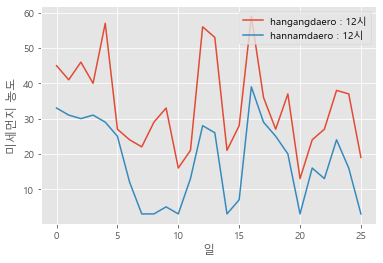

In [69]:
plot_compare_rev1(hangangdaero, hannamdaero, time)

plt.legend()
plt.xlabel('일')
plt.ylabel('미세먼지 농도')
plt.show()

In [70]:
tlen = len(hangangdaero) # list의 크기 (nan 값을 제외한)
chai_hap = 0
for i in range(tlen):
    chai_hap += hangangdaero[i] - hannamdaero[i]
if chai_hap < 0:
    print('chai합이 0보다 작음')
avg_chai = chai_hap / tlen
avg_chai = round(avg_chai,2)
print('평균 차이는', avg_chai)

평균 차이는 15.62


In [71]:
tlen = len(hangangdaero) # list의 크기 (nan 값을 제외한)
sumA = sumB = 0
for i in range(tlen):
    sumA += hangangdaero[i]
    sumB += hannamdaero[i]
biyul = (sumA/sumB)*100
biyul = round(biyul,2)
print('비율은',biyul,'%')

비율은 186.38 %


In [72]:
tlen = len(hangangdaero) # list의 크기 (nan 값을 제외한)
biyul = 0
sumBiyul = 0
for i in range(tlen):
    biyul = (hangangdaero[i]/hannamdaero[i])*100
#     print(biyul)
    sumBiyul += biyul
avgBiyul = sumBiyul / tlen
avgBiyul = round(avgBiyul,2)
print('평균 비율은',avgBiyul,'%')

평균 비율은 307.56 %
